In [87]:
# reading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [44]:
#dataset path
path=r"F:\Health care project\datasets\diabetes.csv"
#reading the dataset
df=pd.read_csv(path)

In [45]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
#here we can easily see that there is no need for aditonal data prerocessing 
# now train and test
X=df.iloc[:,:8]
print(X.shape[1])

8


In [47]:
y=df[["Outcome"]]

In [111]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [112]:
X_train.shape,X_test.shape

((576, 8), (192, 8))

In [113]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [114]:
treeclassifier=DecisionTreeClassifier(max_depth=5)

In [115]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

[Text(0.48214285714285715, 0.9166666666666666, 'x[1] <= 143.5\ngini = 0.452\nsamples = 576\nvalue = [377, 199]'),
 Text(0.23214285714285715, 0.75, 'x[7] <= 28.5\ngini = 0.36\nsamples = 454\nvalue = [347, 107]'),
 Text(0.11904761904761904, 0.5833333333333334, 'x[1] <= 127.5\ngini = 0.208\nsamples = 246\nvalue = [217, 29]'),
 Text(0.07142857142857142, 0.4166666666666667, 'x[5] <= 49.1\ngini = 0.134\nsamples = 208\nvalue = [193.0, 15.0]'),
 Text(0.047619047619047616, 0.25, 'x[5] <= 31.4\ngini = 0.118\nsamples = 206\nvalue = [193, 13]'),
 Text(0.023809523809523808, 0.08333333333333333, 'gini = 0.017\nsamples = 119\nvalue = [118, 1]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.238\nsamples = 87\nvalue = [75, 12]'),
 Text(0.09523809523809523, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.16666666666666666, 0.4166666666666667, 'x[2] <= 56.0\ngini = 0.465\nsamples = 38\nvalue = [24, 14]'),
 Text(0.14285714285714285, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),


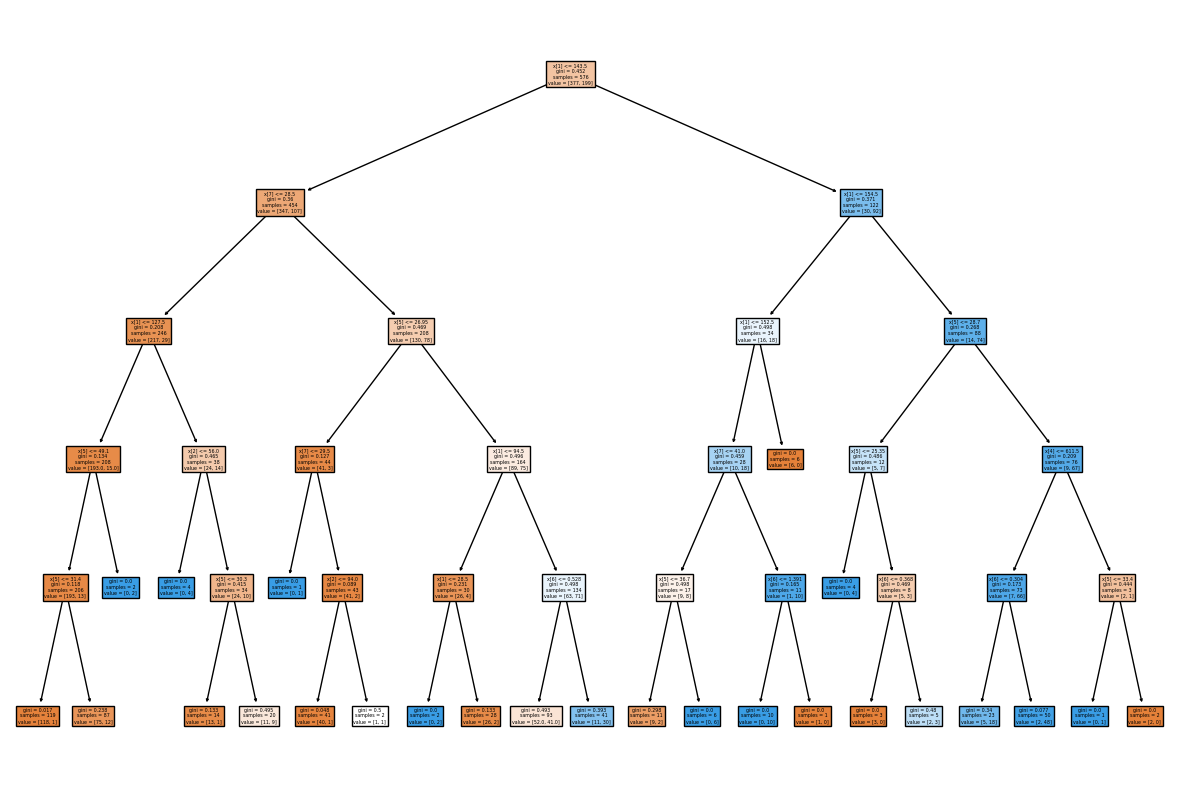

In [116]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [117]:
#make prediction
y_pred=treeclassifier.predict(X_test)

In [118]:
score=accuracy_score(y_pred,y_test)
print(score)
print()
print(classification_report(y_pred,y_test))

0.7239583333333334

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       126
           1       0.59      0.62      0.61        66

    accuracy                           0.72       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.73      0.72      0.73       192



In [119]:
# now lets use logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('Accuracy:',accuracy_score(prediction,y_test))

Accuracy: 0.7291666666666666


In [120]:
# now let's try hyperparameter tunning for decision tree
parameters={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [121]:
treeclassifier=DecisionTreeClassifier()
clf=GridSearchCV(treeclassifier,param_grid=parameters,cv=5,scoring='accuracy')

In [122]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [123]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'best'}

In [124]:
#prediction
y_pred=clf.predict(X_test)

In [125]:
score=accuracy_score(y_pred,y_test)
print(score)
print()
print(classification_report(y_pred,y_test))

0.7135416666666666

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       138
           1       0.49      0.63      0.55        54

    accuracy                           0.71       192
   macro avg       0.67      0.69      0.67       192
weighted avg       0.74      0.71      0.72       192



In [126]:
# now lets try Random Forest
rf_classifier=RandomForestClassifier(n_estimators=200,random_state=42)

In [127]:
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [128]:
y_pred=rf_classifier.predict(X_test)

In [129]:
accuracy=accuracy_score(y_test,y_pred)
print()
print(f'Accuracy :{accuracy}')
print()
precision,recall,f1_score,_=precision_recall_fscore_support(y_test,y_pred)


Accuracy :0.7395833333333334



In [130]:
import xgboost as xgb

In [131]:
xgb_classifier=xgb.XGBClassifier(objective='multi:softmax',num_class=4)

In [132]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)

In [94]:
y_pred=xgb_classifier.predict(X_test)

In [95]:
accuracy=accuracy_score(y_test,y_pred)
print()
print(f'Accuracy :{accuracy:.2f}')
print()
precision,recall,f1_score,_=precision_recall_fscore_support(y_test,y_pred)


Accuracy :0.72



# here are the model summary
Decision tree- 67%
Logistic regression- 72%
RandomForest:- 73%
Xg-boost:-72%

In [106]:
# so we need to move forward with RandomForest
import pickle
pickle.dump(scaler,open('Diabetes_scaler.pkl','wb'))
pickle.dump(rf_classifier,open('Diabetes.pkl','wb'))

In [133]:
X_test_prediction = rf_classifier.predict(X_test)
accuracy=accuracy_score(y_test,X_test_prediction)

In [134]:
accuracy

0.7395833333333334